In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content

/content


In [ ]:
# clone yolov5
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14554, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 14554 (delta 66), reused 80 (delta 41), pack-reused 14446
Receiving objects: 100% (14554/14554), 13.49 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (10039/10039), done.


In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 42.1 MB/s 


In [ ]:
# dataset roboflow
!unzip /content/drive/MyDrive/Yolov5x/DatasetRoboflow.zip

Archive:  /content/drive/MyDrive/Yolov5x/DatasetRoboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/20220624_154205_jpg.rf.379d32af9d363c36f197519d22abfc90.jpg  
 extracting: test/images/20220624_154217_jpg.rf.cd5b61680b94d32a1eaf9fc3236243d3.jpg  
 extracting: test/images/20220624_154335_jpg.rf.8edc12247f788c8084ca49685554d0cb.jpg  
 extracting: test/images/20220624_161927_jpg.rf.79f579f28d8e6a4278158a07815adf39.jpg  
 extracting: test/images/20220624_161942_jpg.rf.01e89b382884ce0e1a9473520b53af05.jpg  
 extracting: test/images/20220624_162007_jpg.rf.8b95579a38df7801af128fdde6dc3719.jpg  
 extracting: test/images/20220715_202603_jpg.rf.eda5ba30e06ce6b620ddf1ab33cbdeee.jpg  
 extracting: test/images/20220715_202642_jpg.rf.6786d0a0c176e6cedd413f4a3ce4f5dc.jpg  
 extracting: test/images/20220715_224626_jpg.rf.184a837bee55cdb81b2524feb2acc4a8.jpg

In [ ]:
%cd /content

/content


In [ ]:
# model yolo
!unzip /content/drive/MyDrive/Yolov5x/yolov5x250Epochs.zip

Archive:  /content/drive/MyDrive/Yolov5x/yolov5x250Epochs.zip
   creating: content/content/yolov5/
  inflating: content/content/yolov5/yolov5x.pt  
   creating: content/content/yolov5/runs/
   creating: content/content/yolov5/runs/val/
   creating: content/content/yolov5/runs/val/exp4/
   creating: content/content/yolov5/runs/val/exp3/
  inflating: content/content/yolov5/runs/val/exp3/val_batch1_pred.jpg  
  inflating: content/content/yolov5/runs/val/exp3/val_batch1_labels.jpg  
  inflating: content/content/yolov5/runs/val/exp3/val_batch0_pred.jpg  
  inflating: content/content/yolov5/runs/val/exp3/val_batch0_labels.jpg  
  inflating: content/content/yolov5/runs/val/exp3/F1_curve.png  
  inflating: content/content/yolov5/runs/val/exp3/R_curve.png  
  inflating: content/content/yolov5/runs/val/exp3/PR_curve.png  
  inflating: content/content/yolov5/runs/val/exp3/confusion_matrix.png  
  inflating: content/content/yolov5/runs/val/exp3/P_curve.png  
   creating: content/content/yolov5/run

In [ ]:
# training dataset
# img size 416
# batch size 16
# epochs 250
%cd /content/yolov5/

!python /content/yolov5/train.py --img 416 --batch 16 --epochs 200  --data /content/data.yaml --weights yolov5x.pt --name Datasetyolov5x250epochs

/content/yolov5
train: weights=yolov5x.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Datasetyolov5x250epochs, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [ ]:
#visualisasi kelas, koordinat bounding box
import yaml

with open('/content/yolov5/data.yaml','r') as f: data = yaml.full_load(f)

data['train'] = '/content/yolov5/train/images'
data['val'] = '/content/yolov5/valid/images'
with open('/content/yolov5/data.yaml','w') as f: yaml.dump(data,f)

print(data)

FileNotFoundError: ignored

In [ ]:
%cat /content/yolov5/data.yaml

names:
- Aryo
- Falgi
- Fresma
- Naufal
- Wima
nc: 5
train: /content/yolov5/train/images
val: /content/yolov5/valid/images


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir /content/content/content/yolov5/runs

In [ ]:
from IPython.display import Image
import os

!python /content/yolov5/detect.py --weights /content/content/content/yolov5/runs/train/Datasetyolov5x250epochs/weights/best.pt --img 416 --conf 0.6 --source "/content/drive/MyDrive/Test/5 foto di luar dataset"
# Image(os.path.join('/content/yolov5/runs/detect/exp0',os.path.basename(val_image_path))) x

detect: weights=['/content/content/content/yolov5/runs/train/Datasetyolov5x250epochs/weights/best.pt'], source=/content/drive/MyDrive/Test/5 foto di luar dataset, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-97-g903b239 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86200330 parameters, 0 gradients, 203.8 GFLOPs
image 1/5 /content/drive/MyDrive/Test/5 foto di luar dataset/20220624_154217.jpg: 416x320 1 Naufal, 54.3ms
image 2/5 /content/drive/MyDrive/Test/5 foto di luar dataset/20220624_161931.jpg: 416x320 1 Fresma, 54.1ms
image 3/5 /content/drive/MyDrive/Te

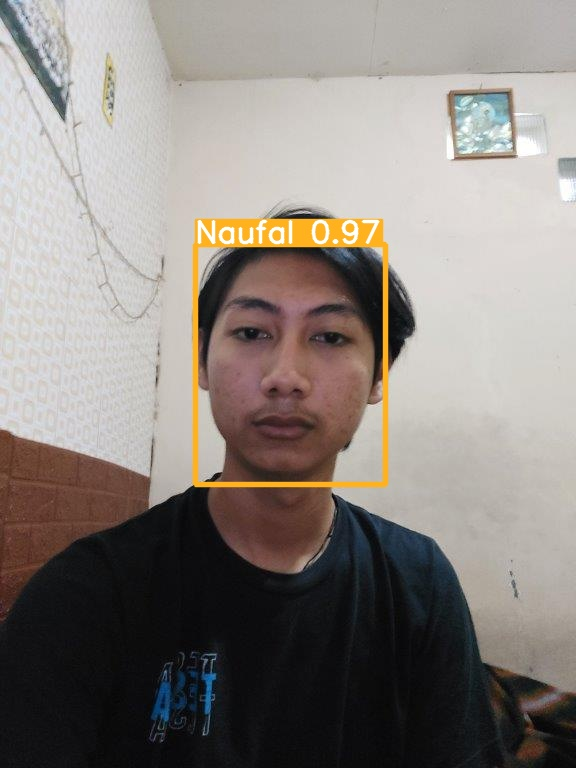

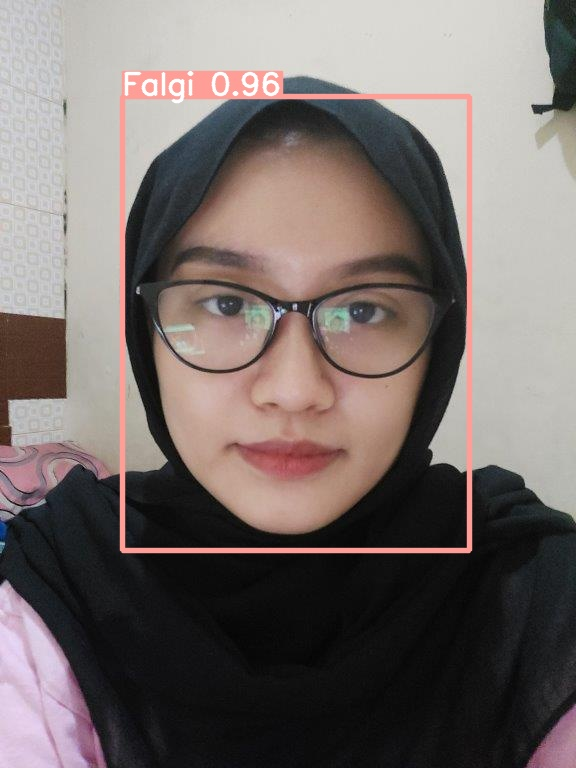

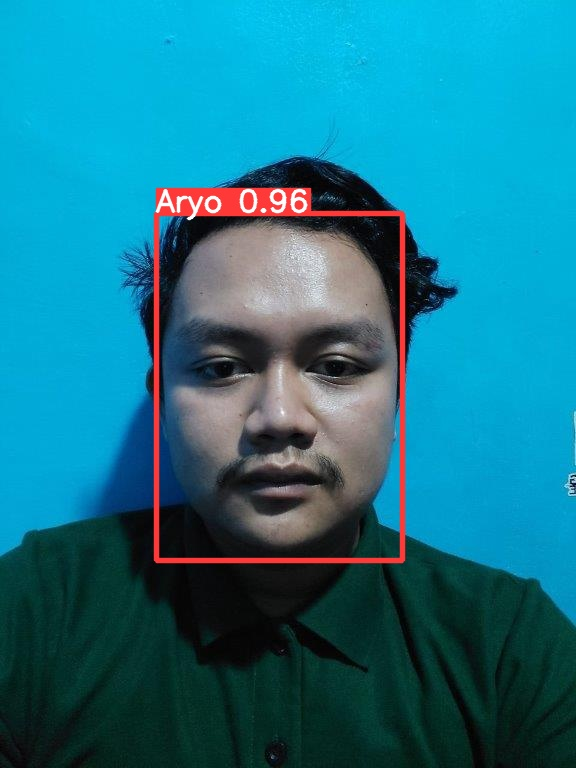

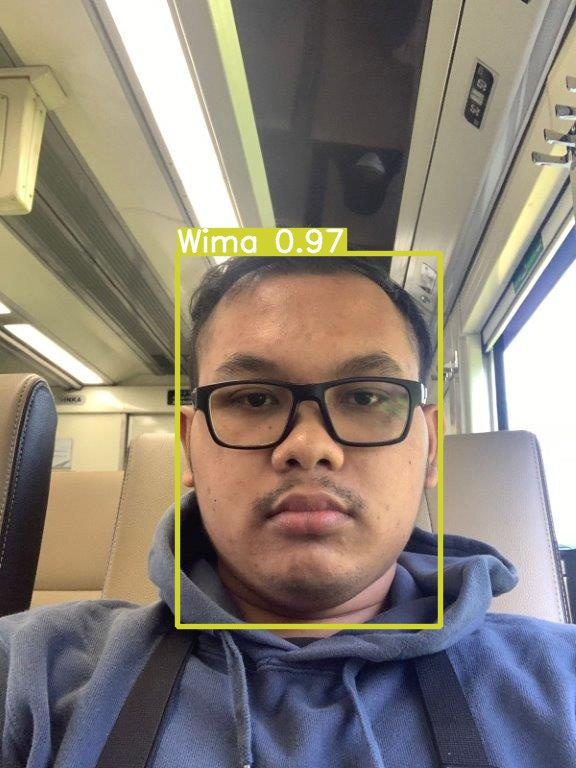

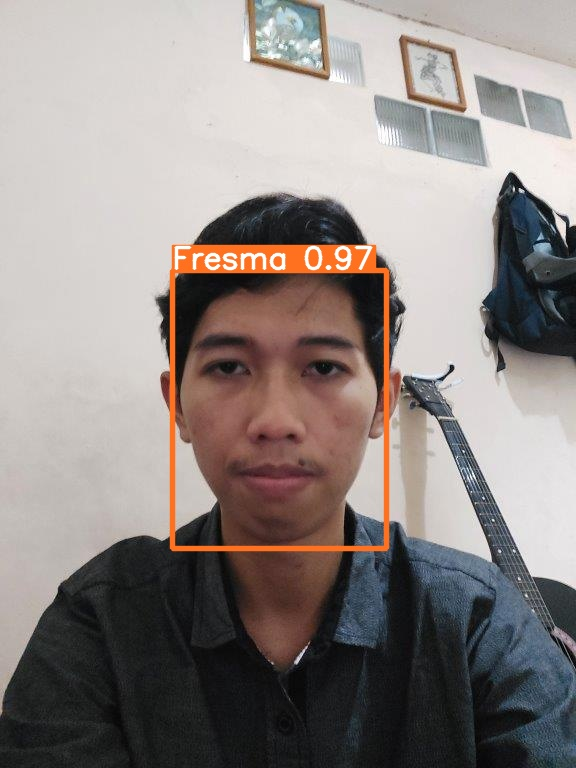

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
%cp /content/yolov5/runs/train/Dataset300Epoch/weights/best.pt /content/drive/MyDrive/DatasetEpoch300

In [ ]:
!zip -r /content/yolov5.zip /content/content/yolov5

  adding: content/content/yolov5/ (stored 0%)
  adding: content/content/yolov5/yolov5/ (stored 0%)
  adding: content/content/yolov5/yolov5/.gitignore (deflated 55%)
  adding: content/content/yolov5/yolov5/.pre-commit-config.yaml (deflated 60%)
  adding: content/content/yolov5/yolov5/README.md (deflated 78%)
  adding: content/content/yolov5/yolov5/train.py (deflated 69%)
  adding: content/content/yolov5/yolov5/detect.py (deflated 68%)
  adding: content/content/yolov5/yolov5/hubconf.py (deflated 73%)
  adding: content/content/yolov5/yolov5/requirements.txt (deflated 50%)
  adding: content/content/yolov5/yolov5/utils/ (stored 0%)
  adding: content/content/yolov5/yolov5/utils/__init__.py (deflated 46%)
  adding: content/content/yolov5/yolov5/utils/activations.py (deflated 68%)
  adding: content/content/yolov5/yolov5/utils/plots.py (deflated 65%)
  adding: content/content/yolov5/yolov5/utils/metrics.py (deflated 66%)
  adding: content/content/yolov5/yolov5/utils/augmentations.py (deflated 6

## AKSES CAMERA

In [ ]:
# Akses kamera
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  !python /content/content/content/yolov5/detect.py \
    --source {filename} \
    --name fmd_camera \
    --weights /content/content/content/yolov5/runs/train/Datasetyolov5x250epochs/weights/best.pt \
    --img 640 \
    --line-thickness 1 \
    --conf-thres 0.5 \
    --iou-thres 0.5 \
    --exist-ok
  
  # Show the image which was just taken.
  display(Image(f'/content/content/content/yolov5/runs/detect/fmd_camera/{filename}'))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/yolov5/ (stored 0%)
  adding: content/yolov5/yolov5/.gitignore (deflated 55%)
  adding: content/yolov5/yolov5/.pre-commit-config.yaml (deflated 60%)
  adding: content/yolov5/yolov5/README.md (deflated 78%)
  adding: content/yolov5/yolov5/train.py (deflated 69%)
  adding: content/yolov5/yolov5/detect.py (deflated 68%)
  adding: content/yolov5/yolov5/hubconf.py (deflated 73%)
  adding: content/yolov5/yolov5/requirements.txt (deflated 50%)
  adding: content/yolov5/yolov5/utils/ (stored 0%)
  adding: content/yolov5/yolov5/utils/__init__.py (deflated 46%)
  adding: content/yolov5/yolov5/utils/activations.py (deflated 68%)
  adding: content/yolov5/yolov5/utils/plots.py (deflated 65%)
  adding: content/yolov5/yolov5/utils/metrics.py (deflated 66%)
  adding: content/yolov5/yolov5/utils/augmentations.py (deflated 63%)
  adding: content/yolov5/yolov5/utils/general.py (deflated 65%)
  adding: content/yolov5/yolov5/utils/callbacks.py (